In [52]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df_train = pd.read_csv('../dataset/ClimateTrain.csv')
df_test = pd.read_csv('../dataset/ClimateTest.csv')
df = df_train
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [54]:
len(df_train)

1462

In [55]:
len(df_test)

114

## Uni-Variate Forecasting

In [56]:
df_train = df_train.rename(columns={'meantemp' : 'y', 'date' : 'ds'})
df_train['y_orig'] = df_train['y']
df_train['y'] = np.log(df_train['y'])
df_train.head()

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [57]:
model = Prophet()
model.fit(df_train)

11:44:15 - cmdstanpy - INFO - Chain [1] start processing
11:44:15 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
future_data = model.make_future_dataframe(periods=113, freq='D')

forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1570,2017-04-20,3.550271,3.426206,3.666765
1571,2017-04-21,3.554038,3.434689,3.677050
1572,2017-04-22,3.554314,3.432761,3.679444
1573,2017-04-23,3.553681,3.420539,3.686083
1574,2017-04-24,3.570943,3.442510,3.699299


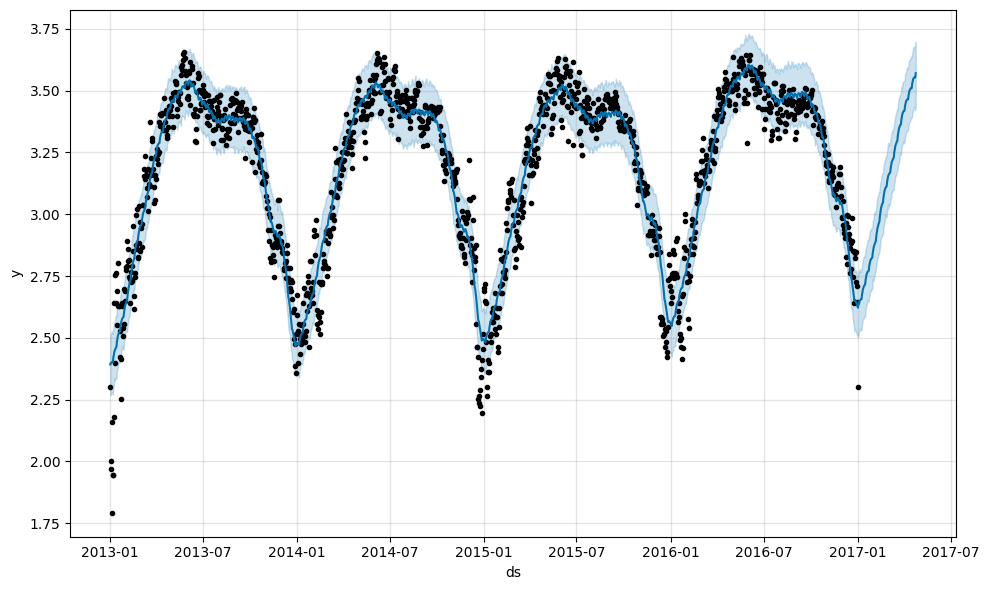

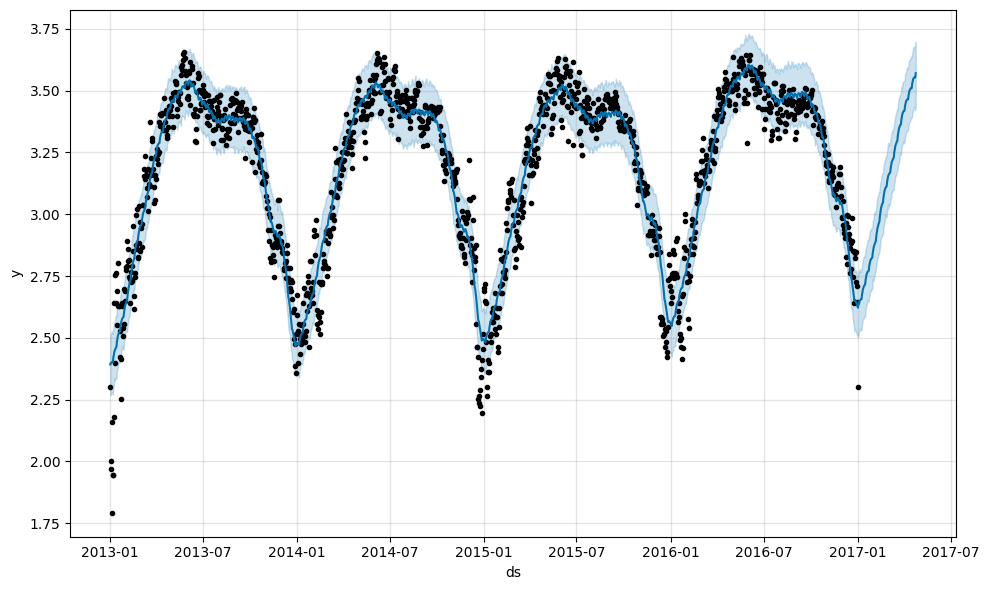

In [59]:
model.plot(forecast_data)

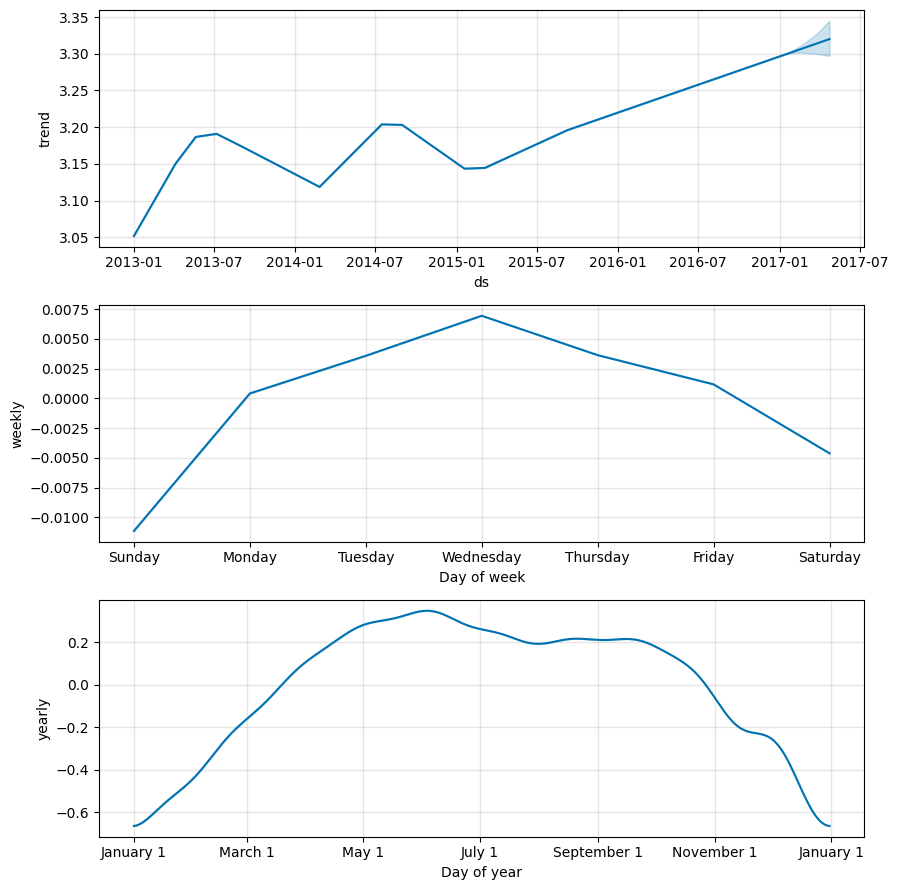

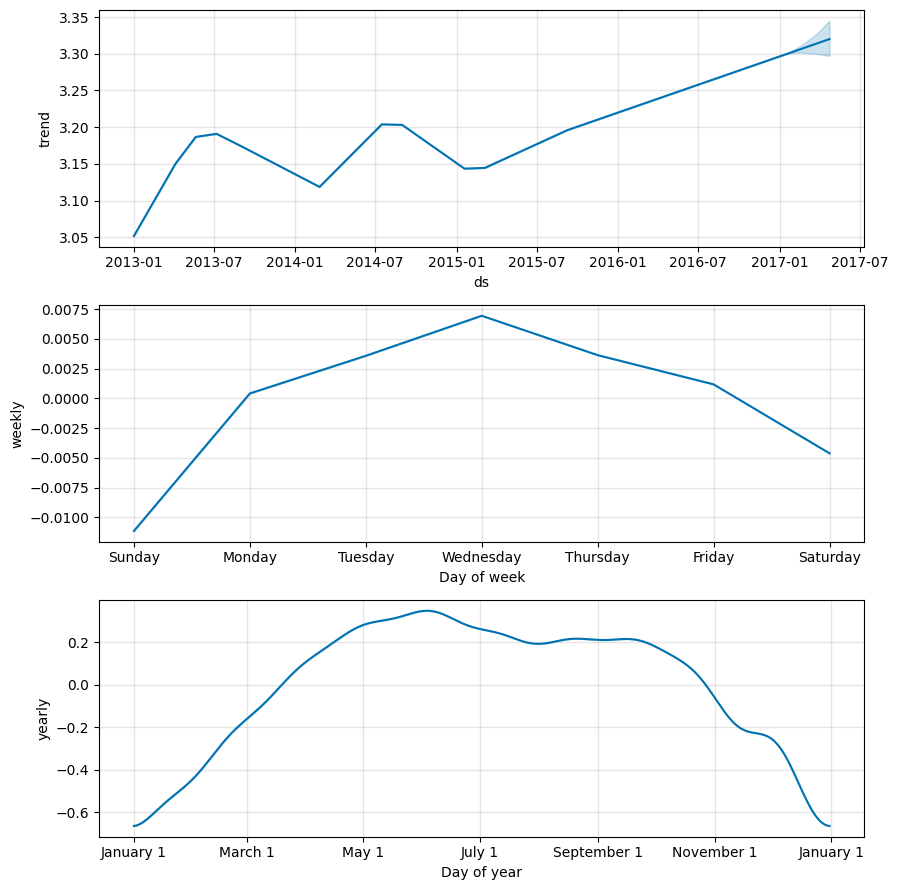

In [60]:
model.plot_components(forecast_data)

In [61]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

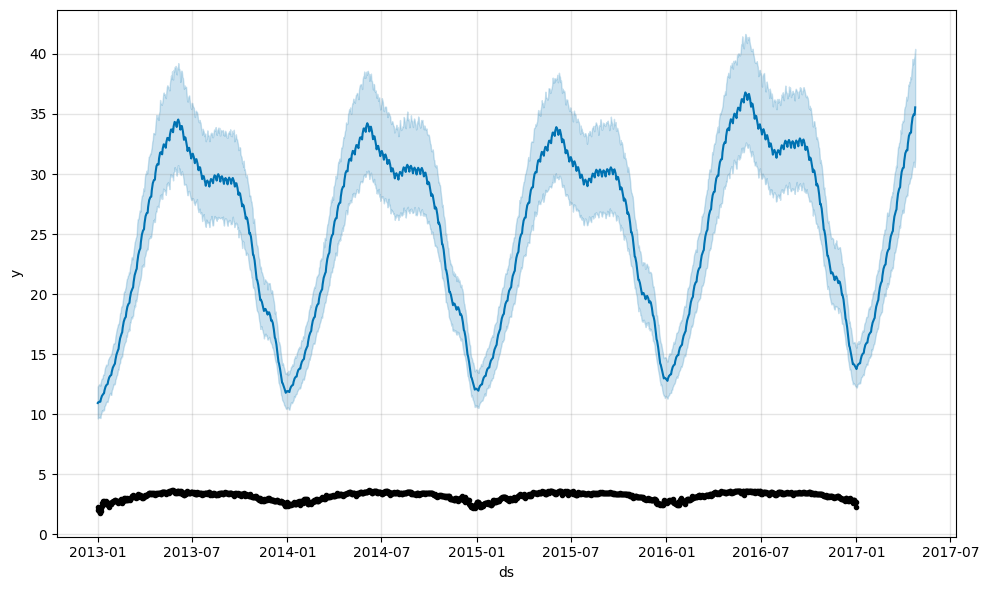

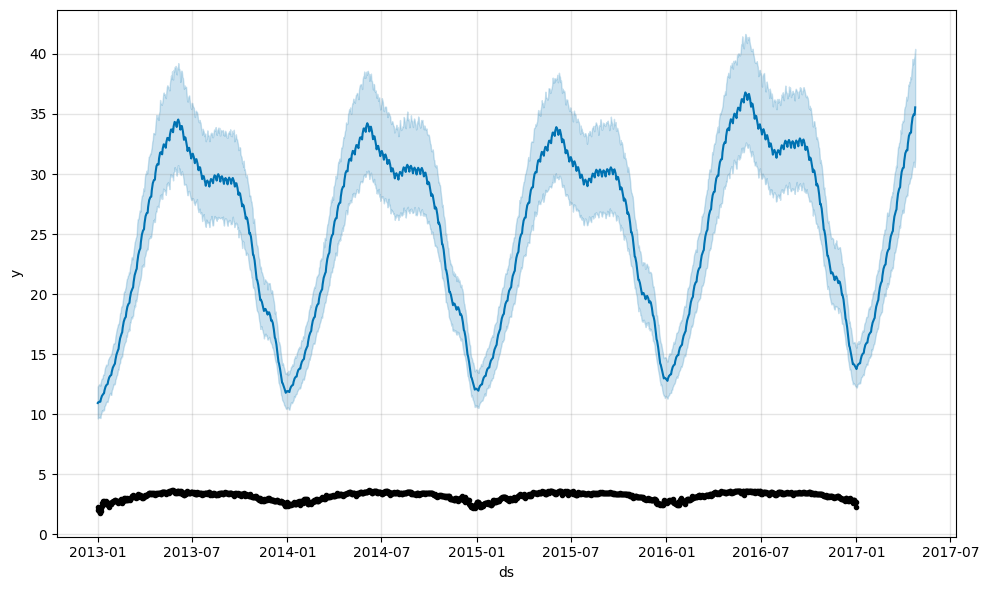

In [62]:
model.plot(forecast_data_orig)

In [63]:
df_train['y_log'] = df_train['y']
df_train['y'] = df_train['y_orig']
df_train.head()

,ds,y,humidity,wind_speed,meanpressure,y_orig,y_log
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,10.000000,2.302585
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.400000,2.001480
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.166667,1.969441
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,8.666667,2.159484
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,6.000000,1.791759


In [64]:
final_df = pd.DataFrame(forecast_data_orig)

In [65]:
import plotly.graph_objs as go
import plotly.offline as py

actual_chart = go.Scatter(y=df_train['y_orig'], name='Actual')
predict_chart = go.Scatter(y=final_df['yhat'], name='Predicted')
predict_chart_upper = go.Scatter(y=final_df['yhat_upper'], name='Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df['yhat_lower'], name='Predicted Lower')

py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [66]:
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [67]:
final_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.051742,9.647069,12.305197,3.051742,3.051742,-0.660064,-0.660064,-0.660064,0.003585,0.003585,0.003585,-0.663649,-0.663649,-0.663649,0.0,0.0,0.0,10.931824
1,2013-01-02,3.052793,9.705909,12.370686,3.052793,3.052793,-0.655078,-0.655078,-0.655078,0.006954,0.006954,0.006954,-0.662031,-0.662031,-0.662031,0.0,0.0,0.0,10.998015
2,2013-01-03,3.053843,9.718157,12.451995,3.053843,3.053843,-0.655527,-0.655527,-0.655527,0.003641,0.003641,0.003641,-0.659168,-0.659168,-0.659168,0.0,0.0,0.0,11.004623
3,2013-01-04,3.054893,9.750310,12.446412,3.054893,3.054893,-0.653998,-0.653998,-0.653998,0.001182,0.001182,0.001182,-0.655180,-0.655180,-0.655180,0.0,0.0,0.0,11.033046
4,2013-01-05,3.055943,9.777229,12.528599,3.055943,3.055943,-0.654816,-0.654816,-0.654816,-0.004622,-0.004622,-0.004622,-0.650194,-0.650194,-0.650194,0.0,0.0,0.0,11.035606


In [68]:
rows = final_df['yhat'].tail(113)

In [69]:
rows = rows.reset_index()

In [70]:
rows.pop('index')
rows.head()

,yhat
0,13.943480
1,14.030775
2,14.137336
3,14.163976
4,14.215066


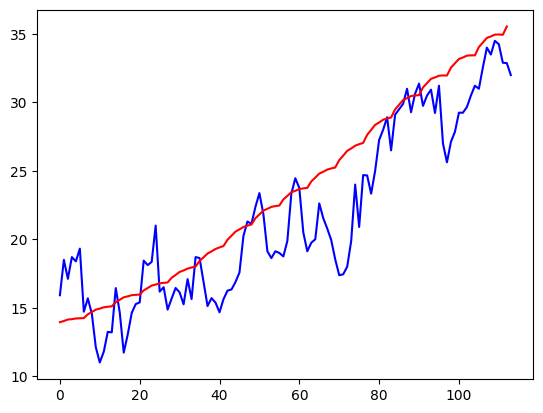

In [71]:
plt.plot(df_test['meantemp'], color='blue')
plt.plot(rows, color='red')
plt.show()

## Multi-variate Forecasting

In [72]:
df_train = df_train.rename(columns={'meantemp' : 'y', 'date' : 'ds'})
df_train['y_orig'] = df_train['y']
df_train['y'] = np.log(df_train['y'])
df_train.head()

,ds,y,humidity,wind_speed,meanpressure,y_orig,y_log
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000,2.302585
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000,2.001480
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667,1.969441
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667,2.159484
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000,1.791759


In [73]:
model_new = Prophet()

model_new.add_regressor('humidity')
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')

In [74]:
model_new.fit(df_train)

11:44:17 - cmdstanpy - INFO - Chain [1] start processing
11:44:17 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
future_data = model_new.make_future_dataframe(periods=113, freq = 'D')
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [80]:
df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'humidity', 'wind_speed', 'meanpressure']]
future_data.head()


,ds,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000


In [82]:
forecast_data_new = model_new.predict(future_data)

forecast_data_new[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1457,2016-12-28,2.676948,2.573008,2.787144
1458,2016-12-29,2.572202,2.461545,2.680598
1459,2016-12-30,2.563952,2.454491,2.676649
1460,2016-12-31,2.576328,2.465355,2.686399
1461,2017-01-01,2.519909,2.422822,2.636095


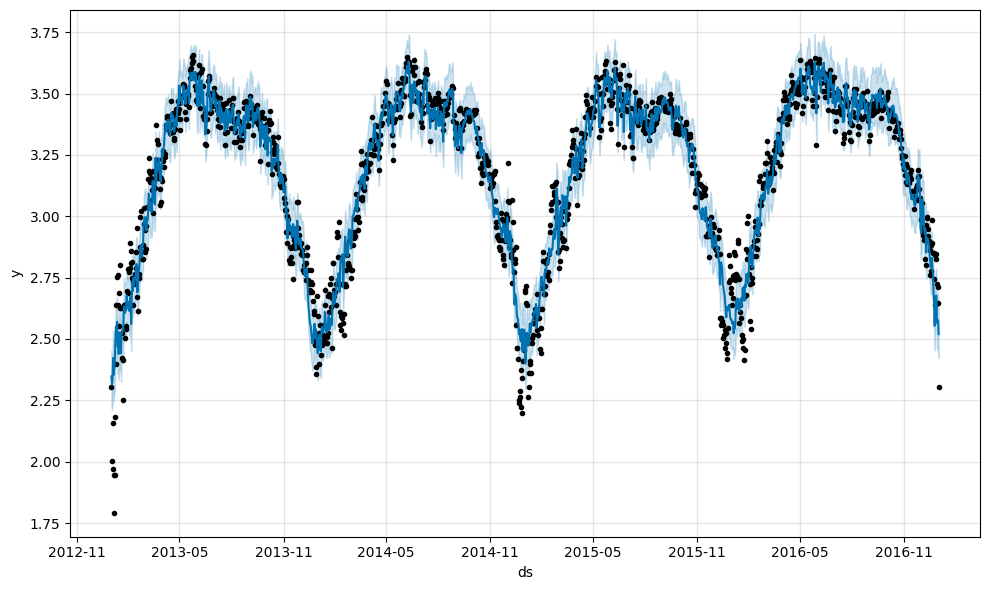

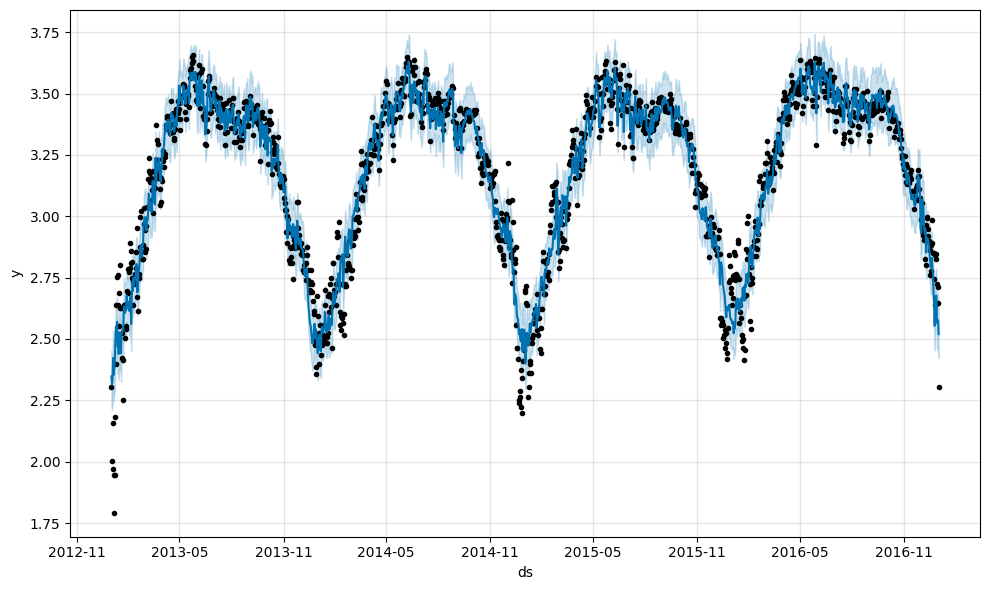

In [83]:
model_new.plot(forecast_data_new)

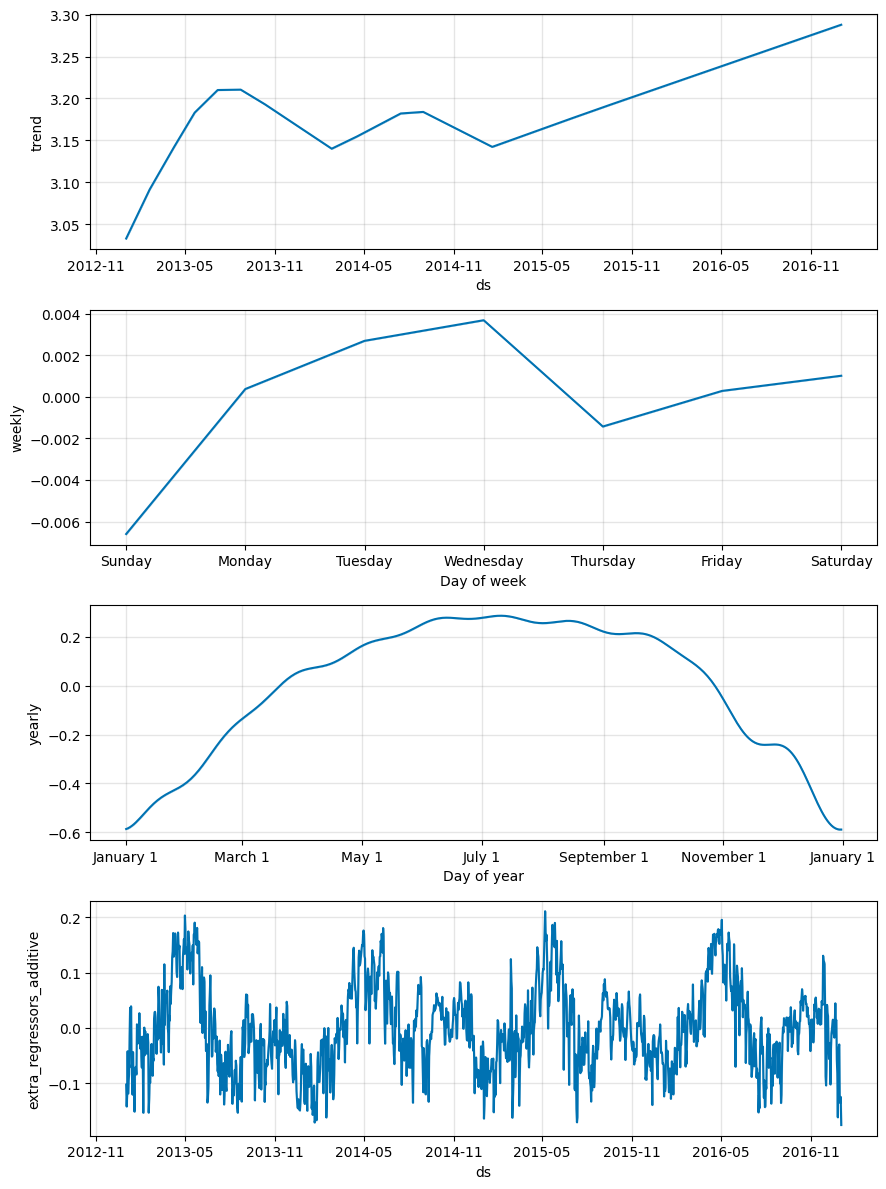

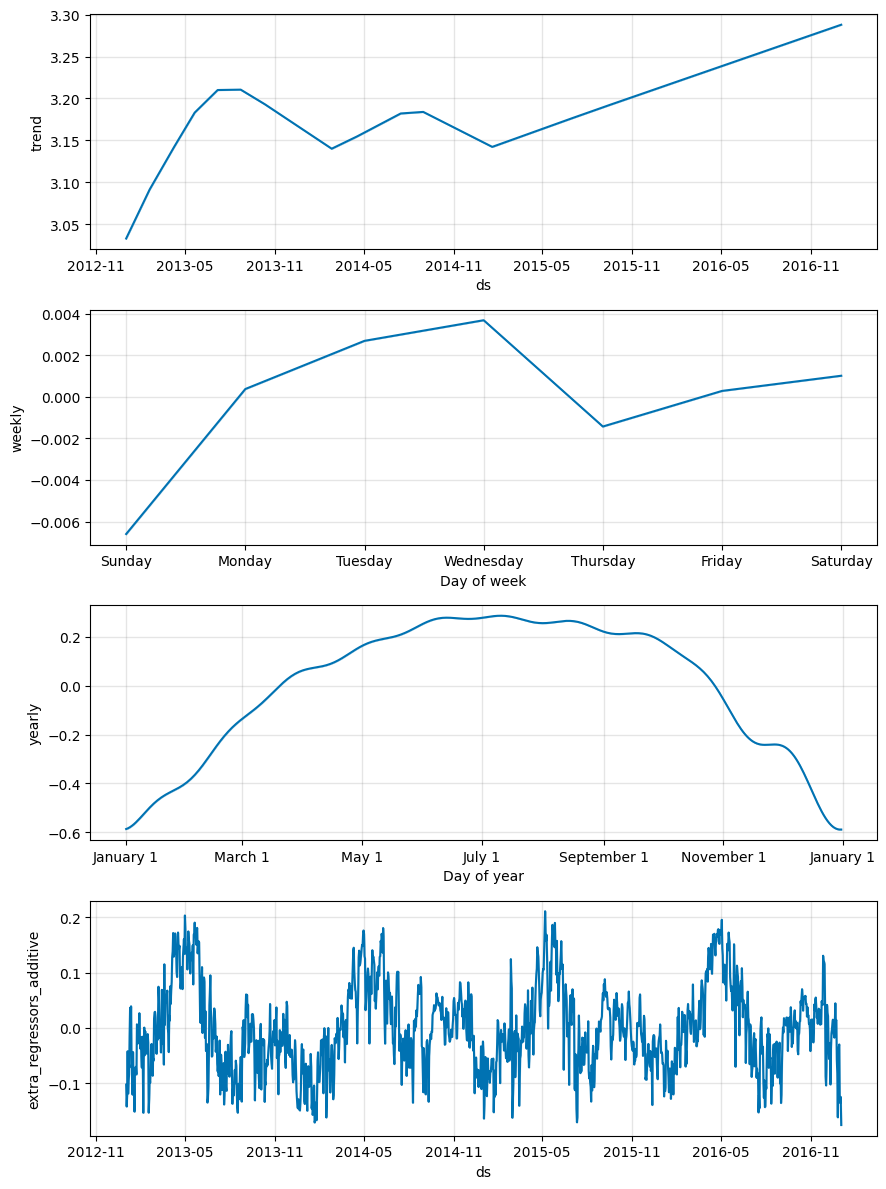

In [84]:
model_new.plot_components(forecast_data_new)